<a href="https://colab.research.google.com/github/sahada19/AIMS_project_code/blob/master/PROJECT_CODE_FOR_THE_MULTILAYER_PERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MULTI-LAYER PERCEPTRON FOR PREDICTING RETURNS

Import of libraries

In [ ]:
##import of libraries to be used
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as scs
%matplotlib inline
import numpy as np
import random
np.random.seed(1337) # for reproducibility
import pandas as pd
import pandas
import math
import matplotlib.pyplot as plt

#for data preprocessing
import seaborn as sns 
from sklearn.model_selection import train_test_split

# Keras imports
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras import Sequential
from  tensorflow.python.keras import metrics
from sklearn.metrics import mean_squared_error
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


Install yfinance

In [ ]:
!pip3 install yfinance --upgrade  #installing yfinance

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


Download of datasets from yfinance

In [ ]:
import yfinance as yf
dta1=yf.download ("AAPL",start="2000-01-01",end="2019-12-31")  #download the data for Apple 
dta2=yf.download ("^GSPC",start="2000-01-01",end="2019-12-31")  #download the data for S&P500 index
dta3=yf.download ("GOOGL",start="2000-01-01",end="2019-12-31")  #download the data for Google 
dta4=yf.download ("AMZN",start="2000-01-01",end="2019-12-31")   #download the data for Amazon 
dta5=yf.download ("MSFT",start="2000-01-01",end="2019-12-31")   #download the data for Microsoft
dta6=yf.download ("JPM",start="2000-01-01",end="2019-12-31")   #download the data for JPM 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data pre-processing

In [ ]:
##assign datasets to names
apple_data = dta1 
sp500_data = dta2 
goog_data = dta3
amzn_data = dta4 
micr_data = dta5
jpm_data =dta6

In [ ]:
apple_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.562683,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500
2019-12-30,289.459991,292.690002,285.220001,291.519989,290.044617,36028600


In [ ]:
#view the first five data for S&P500 index 
sp500_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [ ]:
#view the first five data for Amazon
amzn_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,81.5000,89.5625,79.046875,89.3750,89.3750,16117600
2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400
2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400
2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000
2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400


In [ ]:
#view the first five data for Microsoft
micr_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.68750,59.3125,56.00000,58.28125,37.289700,53228400
2000-01-04,56.78125,58.5625,56.12500,56.31250,36.030037,54119000
2000-01-05,55.56250,58.1875,54.68750,56.90625,36.409924,64059600
2000-01-06,56.09375,56.9375,54.18750,55.00000,35.190277,54976600
2000-01-07,54.31250,56.1250,53.65625,55.71875,35.650139,62013600


In [ ]:
#view the first five data for JPM
jpm_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,49.833332,50.250000,48.083332,48.583332,26.551420,12019200
2000-01-04,47.083332,47.458332,46.125000,47.250000,25.968838,11723400
2000-01-05,46.833332,48.375000,46.000000,46.958332,25.808540,8714500
2000-01-06,46.750000,48.625000,46.500000,47.625000,26.174952,8369200
2000-01-07,48.416668,49.000000,47.333332,48.500000,26.655846,6571900


View data shape

In [ ]:
jpm_data.shape #view data shape for JPM

(5030, 6)

In [ ]:
sp500_data.shape #view data shape for S&P500 index

(5030, 6)

In [ ]:
apple_data.shape ##view data shape for Apple

(5030, 6)

In [ ]:
micr_data.shape #view data shape for Microsoft

(5030, 6)

In [ ]:
amzn_data.shape #view data shape for Amazon

(5030, 6)

In [ ]:
goog_data.shape #view data shape for Google

(3868, 6)

Taking the adjusted close columns

In [ ]:
sp = sp500_data['Adj Close'].values   #pick only the Adjusted close for S&P500 index
sp                                

array([1455.2199707 , 1399.42004395, 1402.10998535, ..., 3239.90991211,
       3240.02001953, 3221.29003906])

In [ ]:
al = apple_data['Adj Close'].values  #pick only the Adjusted close for Apple
al

array([  3.46085739,   3.1690712 ,   3.21544814, ..., 288.44277954,
       288.33331299, 290.0446167 ])

In [ ]:
am = amzn_data['Adj Close'].values #pick only the Adjusted close for Amazon
m = micr_data['Adj Close'].values  #pick only the Adjusted close for Microsoft
g = goog_data['Adj Close'].values  #pick only the Adjusted close for Google
j = jpm_data['Adj Close'].values  #pick only the Adjusted close for JPM

Constructing dataframe

In [ ]:
data1=pd.DataFrame(al,columns=['AAPL']) #create a dataframe for Apple
data2=pd.DataFrame(sp,columns=['SP500']) #create a dataframe for S&P00 index
data3=pd.DataFrame(m,columns=['MST']) #create a dataframe for Microsoft
data4=pd.DataFrame(am,columns=['AMZN']) #create a dataframe for Amazon
data5=pd.DataFrame(g,columns=['GOOG']) #create a dataframe for Google
data6=pd.DataFrame(j,columns=['JPM']) #create a dataframe for JPM

In [ ]:
data1.head() #view the first five data for Apple

,AAPL
0,20.552891
1,20.648119
2,19.938246
3,19.809626
4,19.530134


In [ ]:
data6.head() #view the first five data for JPM

,JPM
0,26.407299
1,25.901106
2,25.741232
3,26.106668
4,26.586336


Calculating, plotting and statistics of the returns 

In [ ]:
####### This function returns the statistics of a data##########
###### It takes an array of data as an argument ################

def statistics(array):  
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (40 * "*")
    print ("%14s %15.5f" % ('size', sta[0]))
    
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


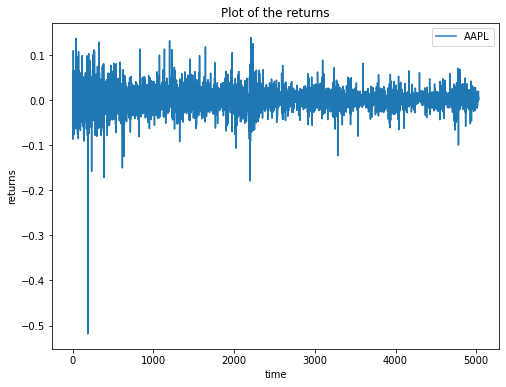

In [ ]:
##calculate the value of the returns for apple
returns1 = data1 / data1.shift(1) - 1 
returns1.plot(figsize=(8, 6))  #plot of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of the returns')
plt.show()

Text(0.5, 1.0, 'Histogram of apple returns')

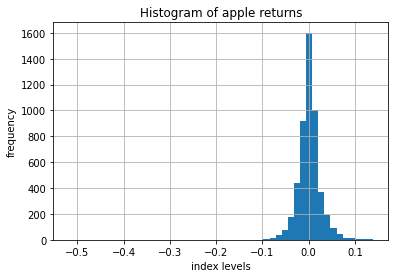

In [ ]:
#plot the histogram Apple returns
returns1.hist(bins=50, figsize=(6, 4))  
plt.xlabel("index levels")
plt.ylabel("frequency")
plt.title('Histogram of apple returns')


In [ ]:
#viewing the statistics for the apple
print ("statistics for AAPL")
print (40 * "*")
returns1_data = np.array(returns1[1:])  #dropping the first no value
statistics(returns1_data)  #Statistics for the returns data

statistics for AAPL
****************************************
     statistic           value
****************************************
          size      5029.00000
           min        -0.51869
           max         0.13905
          mean         0.00122
           std         0.02540
          skew        -1.64205
      kurtosis        38.45169


Text(0.5, 1.0, 'Plot of the sp500 returns')

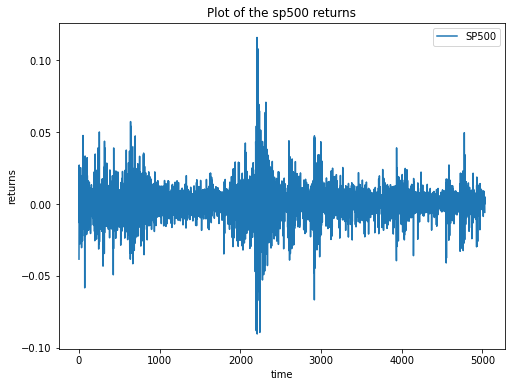

In [ ]:
##calculating the value of the returns for SP500
returns2 = data2 / data2.shift(1) - 1 
returns2.plot(figsize=(8, 6))  #plot of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of the sp500 returns')

Text(0.5, 1.0, 'Histogram of the s&p500 returns')

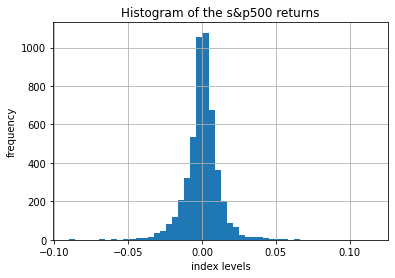

In [ ]:
#plot the histogram for SP500
returns2.hist(bins=50, figsize=(6, 4))  
plt.xlabel("index levels")
plt.ylabel("frequency")
plt.title('Histogram of the s&p500 returns')

In [ ]:
#viewing the statistics for the sp500
print ("statistics for S&P500")
print (40 * "*")
returns2_data = np.array(returns2[1:])  #dropping the first no value
statistics(returns2_data)  #Statistics for the returns data

statistics for S&P500
****************************************
     statistic           value
****************************************
          size      5029.00000
           min        -0.09035
           max         0.11580
          mean         0.00023
           std         0.01189
          skew        -0.03910
      kurtosis         8.81960


Text(0.5, 1.0, 'Plot of the Microsoft returns')

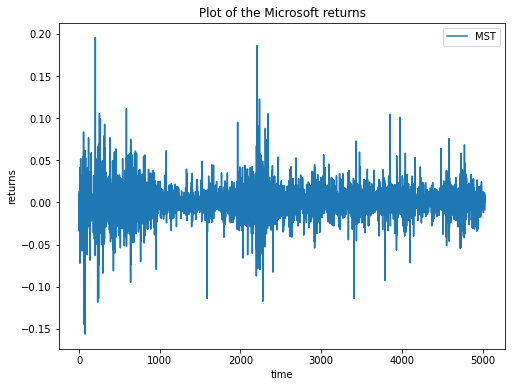

In [ ]:
##calculating the value of the returns for Microsoft
returns3 = data3 / data3.shift(1) - 1 
returns3.plot(figsize=(8, 6))  #plot of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of the Microsoft returns')

Text(0.5, 1.0, 'Histogram of the Microsoft returns')

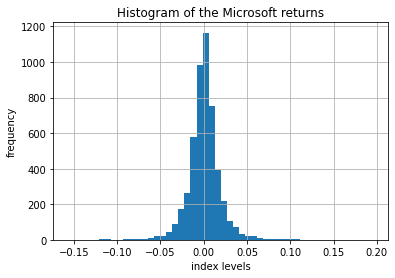

In [ ]:
#plot the histogram for Microsoft
returns3.hist(bins=50, figsize=(6, 4))  
plt.xlabel("index levels")
plt.ylabel("frequency")
plt.title('Histogram of the Microsoft returns')


In [ ]:
#viewing the statistics for the Microsoft
print ("statistics for MICROSOFT")
print (40 * "*")
returns3_data = np.array(returns3[1:])  #dropping the first no value
statistics(returns3_data)  #Statistics for the returns data

statistics for MICROSOFT
****************************************
     statistic           value
****************************************
          size      5029.00000
           min        -0.15598
           max         0.19565
          mean         0.00047
           std         0.01899
          skew         0.20880
      kurtosis        10.21563


Text(0.5, 1.0, 'Plot of the Amazon returns')

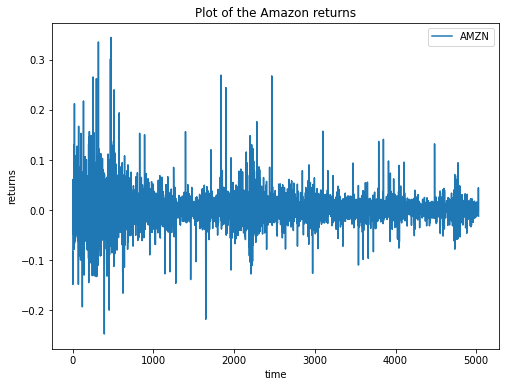

In [ ]:
 ##calculating the value of the returns for Amazon
returns4 = data4 / data4.shift(1) - 1
returns4.plot(figsize=(8, 6))  #plot of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of the Amazon returns')

Text(0.5, 1.0, 'Histogram of the Amazon returns')

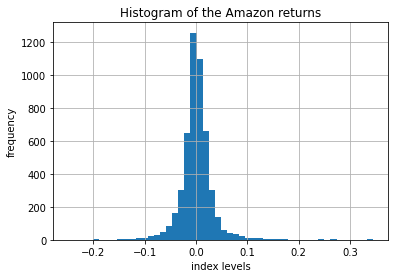

In [ ]:
#plot the histogram for Amazon
returns4.hist(bins=50, figsize=(6, 4))  
plt.xlabel("index levels")
plt.ylabel("frequency")
plt.title('Histogram of the Amazon returns')


In [ ]:
#viewing the statistics for the Amazon
print ("statistics for AMAZON")
print (40 * "*")
returns4_data = np.array(returns4[1:])  #dropping the first no value
statistics(returns4_data)  #Statistics for the returns data

statistics for AMAZON
****************************************
     statistic           value
****************************************
          size      5029.00000
           min        -0.24766
           max         0.34471
          mean         0.00113
           std         0.03287
          skew         1.18640
      kurtosis        15.47447


Text(0.5, 1.0, 'Plot of the Google returns')

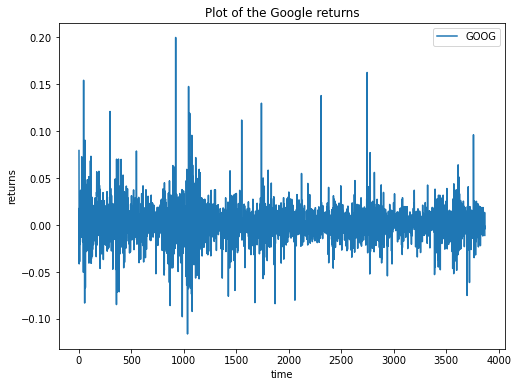

In [ ]:
 ##calculating the value of the returns for Google
returns5 = data5 / data5.shift(1) - 1
returns5.plot(figsize=(8, 6))  #plot of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of the Google returns')

Text(0.5, 1.0, 'Histogram of the Google returns')

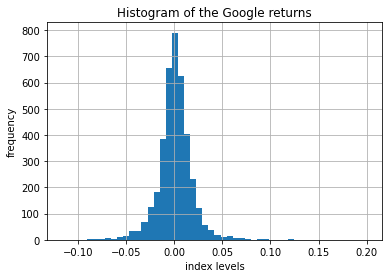

In [ ]:
#plot the histogram for Google
returns5.hist(bins=50, figsize=(6, 4))  
plt.xlabel("index levels")
plt.ylabel("frequency")
plt.title('Histogram of the Google returns')


In [ ]:
#viewing the statistics for the Google
print ("statistics for GOOGLE")
print (40 * "*")
returns5_data = np.array(returns5[1:])  #dropping the first no value
statistics(returns5_data)  #Statistics for the returns data

statistics for GOOGLE
****************************************
     statistic           value
****************************************
          size      3867.00000
           min        -0.11609
           max         0.19992
          mean         0.00103
           std         0.01887
          skew         0.89517
      kurtosis        11.56528


Text(0.5, 1.0, 'Plot of the JPM returns')

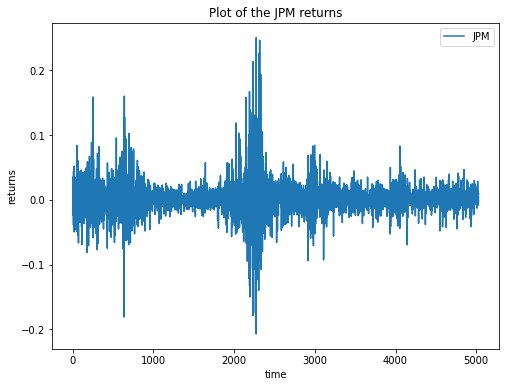

In [ ]:
##calculating the value of the returns for JPM
returns6 = data6 / data6.shift(1) - 1 by


returns6.plot(figsize=(8, 6))  #plot of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of the JPM returns')

Text(0.5, 1.0, 'Histogram of the JPM returns')

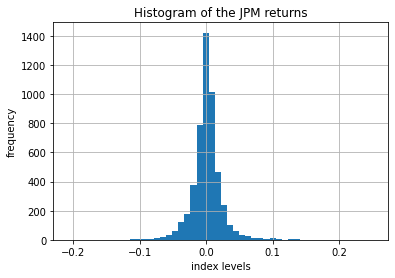

In [ ]:
#plot the histogram for JPM
returns6.hist(bins=50, figsize=(6, 4))  
plt.xlabel("index levels")
plt.ylabel("frequency")
plt.title('Histogram of the JPM returns')

In [ ]:
#viewing the statistics for JPM
print ("\nResults for symbol %s" % 'JPM')
print (40 * "*")
returns6_data = np.array(returns6[1:])  #dropping the first no value
statistics(returns6_data)  #Statistics for the returns data


Results for symbol JPM
****************************************
     statistic           value
****************************************
          size      5029.00000
           min        -0.20727
           max         0.25097
          mean         0.00062
           std         0.02426
          skew         0.86111
      kurtosis        15.77160


# **MLP MODELS**

Reshape the data

In [ ]:
##Reshape of data
X = returns2.values.reshape(-1,1)  #assign our feature, SP500 index to X and reshaping the data 
Y = returns1.values.reshape(-1,1) #assign our target, Apple to Y and reshaping the data 
M = returns3.values.reshape(-1,1)  #assign our target, Microsoft to M and reshaping the data 
Z = returns4.values.reshape(-1,1)  #assign our target, Amazon to Z and reshaping the data 
G = returns5.values.reshape(-1,1)  #assign our target, Amazon to Z and reshaping the data
J = returns6.values.reshape(-1,1) #assign our target, JPM to J and reshaping the data

Check the shape of the data

In [ ]:
X.shape  #view shape for SP500 index

(5030, 1)

In [ ]:
Y.shape   #view shape for Apple

(5030, 1)

In [ ]:
M.shape  #view shape for Microsoft

(5030, 1)

In [ ]:
Z.shape  #view shape for Amazon

(5030, 1)

In [ ]:
J.shape  #view shape for JPM

(5030, 1)

SPLITTING THE DATASETS INTO TESTING AND TRAINING

In [ ]:
###Splitting for Apple
X_train, X_test, Y_train, Y_test = train_test_split(X[1:], Y[1:], test_size=.3)  #splitting our data into training and testing
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.3) #splitting the training data into training and validation

In [ ]:
###Splitting for Amazon
X_train, X_test, Z_train, Z_test = train_test_split(X[1:], Z[1:], test_size=.3)  #splitting our data into training and testing
X_train, X_val, Z_train, Z_val = train_test_split(X_train, Z_train, test_size=.3) #splitting the training data into training and validation

In [ ]:
###Splitting for Microsoft
X_train, X_test, M_train, M_test = train_test_split(X[1:], M[1:], test_size=.3)  #splitting our data into training and testing
X_train, X_val, M_train, M_val = train_test_split(X_train, M_train, test_size=.3) #splitting the training into training and validation

In [ ]:
###Splitting for JPM
X_train, X_test, J_train, J_test = train_test_split(X[1:], J[1:], test_size=.3)  #splitting our data into training and testing
X_train, X_val, J_train, J_val = train_test_split(X_train, J_train, test_size=.3) #splitting the training into training and validation

In [ ]:
##split for Google
##For google need to change the date range for the SP500 since Google started being listed on the NYSE from 19/08/2004
XG_train, XG_test, G_train, G_test = train_test_split(X[1163:], G[1:], test_size=.3)  #splitting our data into training and testing
XG_train, XG_val, G_train, G_val = train_test_split(XG_train, G_train, test_size=.3) #splitting the training into training and validation

View the training, validation and testing data shape

In [ ]:
M_train.shape #View the shape of the training feature

(2464, 1)

In [ ]:
Z_train.shape #View the shape of the training target

(2464, 1)

In [ ]:
X_test.shape #View the shape of the testing feature

(1509, 1)

In [ ]:
J_train.shape

(2464, 1)

In [ ]:
M_test.shape 

(1509, 1)

In [ ]:
X_val.shape 

(1056, 1)

In [ ]:
Y_val.shape #View the shape of the validation target

(1056, 1)

In [ ]:
XG_train.shape #view the shape for sp500 training to be used for google

(1894, 1)

In [ ]:
G_train.shape #view shape of google training

(1894, 1)

 ## **MLP MODEL - GOOGLE**

Creating the neural network model

In [ ]:
def baseline():
    # create model
    model = Sequential()
    
    model.add(Dense(units = 1, input_dim=1, activation='linear'))
    model.add(Dense(units = 1, input_dim=1, activation='linear'))
    
    #a fully connected layer for the output
    model.add(Dense(1, activation='linear'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

In [ ]:
#assign baseline to model
model = baseline()

In [ ]:
#View model parameters
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model and calculate loss at each epoch
history = model.fit(XG_train, G_train,validation_data=(XG_val,G_val),batch_size=20,epochs=60)  

Epoch 1/60
95/95 [==============================] - 1s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 8.8230e-04 - val_mean_squared_error: 8.8230e-04
Epoch 2/60
95/95 [==============================] - 0s 5ms/step - loss: 8.7226e-04 - mean_squared_error: 8.7226e-04 - val_loss: 7.1834e-04 - val_mean_squared_error: 7.1834e-04
Epoch 3/60
95/95 [==============================] - 0s 4ms/step - loss: 6.9352e-04 - mean_squared_error: 6.9352e-04 - val_loss: 5.4901e-04 - val_mean_squared_error: 5.4901e-04
Epoch 4/60
95/95 [==============================] - 0s 4ms/step - loss: 5.6097e-04 - mean_squared_error: 5.6097e-04 - val_loss: 4.5719e-04 - val_mean_squared_error: 4.5719e-04
Epoch 5/60
95/95 [==============================] - 0s 4ms/step - loss: 4.7178e-04 - mean_squared_error: 4.7178e-04 - val_loss: 3.9694e-04 - val_mean_squared_error: 3.9694e-04
Epoch 6/60
95/95 [==============================] - 0s 4ms/step - loss: 4.0716e-04 - mean_squared_error: 4.0716e-04 - val_loss: 

In [ ]:
#predicting on validation data
val_prediction = model.predict(XG_val)

In [ ]:
print('The validation mean squared error is ', mean_squared_error(G_val, val_prediction))

The validation mean squared error is  0.0002328237093006161


In [ ]:
#evaluating on test data
test_prediction = model.predict(XG_test)

In [ ]:
 print('The testing mean squared error is ', mean_squared_error(G_test, test_prediction))

The testing mean squared error is  0.00023761870927787869


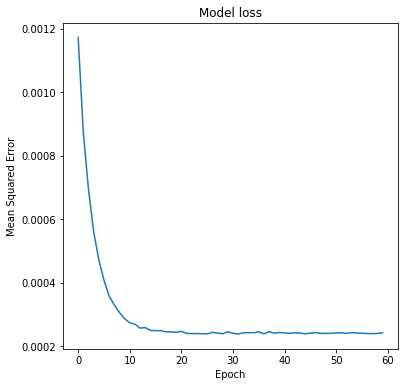

In [ ]:
#plot the mean square errors per the epochs
plt.figure(figsize=(6,6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.savefig('loss1')
plt.show()

In [ ]:
####This function plots the loss per epoch for the validation and training data for easy comparison#####

def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['mean_squared_error'])
    plt.plot(h['val_mean_squared_error'])
    plt.title('Training Performance')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

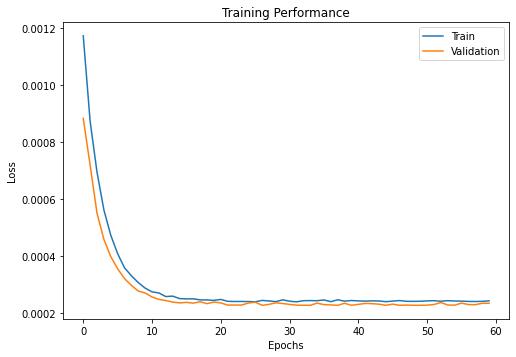

In [ ]:
plot_hist(history.history, xsize=8, ysize=12)
plt.show()

#**MLP MODEL AMAZON**

Creating the neural network

In [ ]:
def baseline():
    # create model
    model = Sequential()
    
    model.add(Dense(units = 1, input_dim=1, activation='linear'))
    model.add(Dense(units = 1, input_dim=1, activation='tanh'))
  
    #a fully connected layer for the output
    model.add(Dense(1, activation='linear'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

In [ ]:
model = baseline()

In [ ]:
model.summary() #View model parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model and calculate loss at each epoch
history = model.fit(X_train, Z_train,validation_data=(X_val,Z_val),batch_size=20,epochs=100)  

Epoch 1/100
124/124 [==============================] - 1s 5ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 2/100
124/124 [==============================] - 1s 5ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 3/100
124/124 [==============================] - 1s 5ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 4/100
124/124 [==============================] - 1s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 5/100
124/124 [==============================] - 1s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 6/100
124/124 [==============================] - 1s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 7/100
124/124 [=

In [ ]:
#predict on validation data
val_prediction = model.predict(X_val)

In [ ]:
print('The validation mean squared error is ', mean_squared_error(Z_val, val_prediction))

The validation mean squared error is  0.000793922818964189


In [ ]:
#evaluate on test data
test_prediction = model.predict(X_test)

In [ ]:
 print('The testing mean squared error is ', mean_squared_error(Z_test, test_prediction))

The testing mean squared error is  0.0007284474248070653


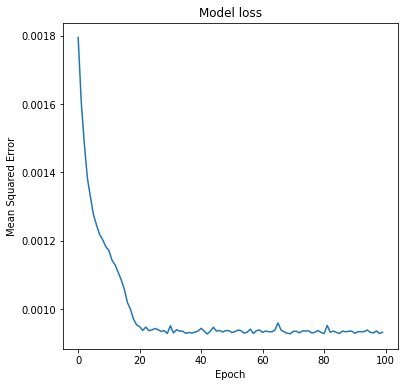

In [ ]:
#plot the mean square errors per the epochs
plt.figure(figsize=(6,6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.savefig('loss1')
plt.show()

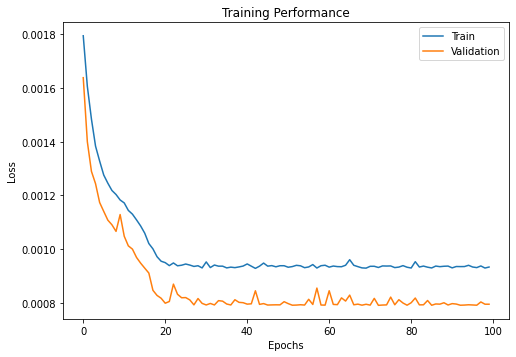

In [ ]:
##plot of validation and training loss per epoch
plot_hist(history.history, xsize=8, ysize=12)
plt.show()

#**MLP MODEL APPLE**

Creating the neural network

In [ ]:
def baseline():
    # create model
    model = Sequential()
    
    model.add(Dense(units = 1, input_dim=1, activation='linear'))
    model.add(Dense(units = 1, input_dim=1, activation='linear'))
  
    #a fully connected layer for the output
    model.add(Dense(1, activation='linear'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

In [ ]:
model = baseline()

In [ ]:
model.summary() #View model parameters

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model and calculate loss at each epoch
history = model.fit(X_train, Y_train,validation_data=(X_val,Y_val),batch_size=20,epochs=100)  

Epoch 1/100
124/124 [==============================] - 1s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2/100
124/124 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 3/100
124/124 [==============================] - 0s 4ms/step - loss: 9.9835e-04 - mean_squared_error: 9.9835e-04 - val_loss: 9.3777e-04 - val_mean_squared_error: 9.3777e-04
Epoch 4/100
124/124 [==============================] - 0s 4ms/step - loss: 8.9364e-04 - mean_squared_error: 8.9364e-04 - val_loss: 8.4326e-04 - val_mean_squared_error: 8.4326e-04
Epoch 5/100
124/124 [==============================] - 0s 4ms/step - loss: 8.2160e-04 - mean_squared_error: 8.2160e-04 - val_loss: 7.8282e-04 - val_mean_squared_error: 7.8282e-04
Epoch 6/100
124/124 [==============================] - 0s 4ms/step - loss: 7.7520e-04 - mean_squared_error: 7.7520e-04 - val_loss: 7.3868

In [ ]:
#predict on validation data
val_prediction = model.predict(X_val)

In [ ]:
print('The validation mean squared error is ', mean_squared_error(Y_val, val_prediction))

The validation mean squared error is  0.00041718491361223146


In [ ]:
#evaluate on test data
test_prediction = model.predict(X_test)

In [ ]:
 print('The testing mean squared error is ', mean_squared_error(Y_test, test_prediction))

The testing mean squared error is  0.0005889007004788525


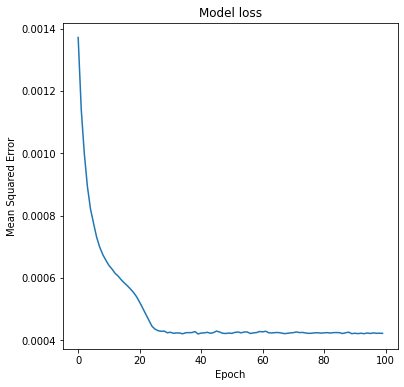

In [ ]:
#plot the mean square errors per the epochs
plt.figure(figsize=(6,6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.savefig('loss1')
plt.show()

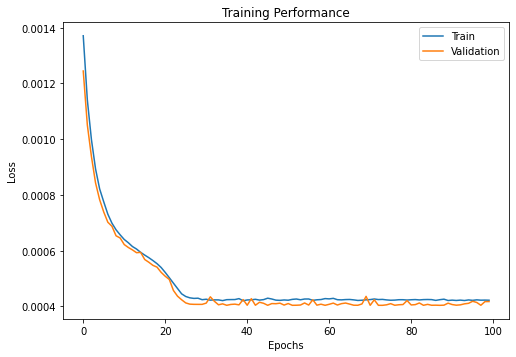

In [ ]:
#plot the validation and training loss per epoch
plot_hist(history.history, xsize=8, ysize=12)
plt.show()

#**MLP MODEL JPM**

Creating the neural network

In [ ]:
def baseline():
    # create model
    model = Sequential()
    
    model.add(Dense(units = 1, input_dim=1, activation='linear'))
    model.add(Dense(units = 1, input_dim=1, activation='tanh'))
  
    #a fully connected layer for the output
    model.add(Dense(1, activation='linear'))
    

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

In [ ]:
model = baseline()

In [ ]:
model.summary() #View model parameters

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model and calculate loss at each epoch
history = model.fit(X_train, J_train,validation_data=(X_val,J_val),batch_size=20,epochs=60)  

Epoch 1/60
124/124 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2/60
124/124 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 3/60
124/124 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 4/60
124/124 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 5/60
124/124 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 6/60
124/124 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 7/60
124/124 [========

In [ ]:
#predict on validation data
val_prediction = model.predict(X_val)


In [ ]:
print('The validation mean squared error is ', mean_squared_error(J_val, val_prediction))

The validation mean squared error is  0.0002515243741389263


In [ ]:
#evaluate on test data
test_prediction = model.predict(X_test)

In [ ]:
print('The testing mean squared error is ', mean_squared_error(J_test, test_prediction))

The testing mean squared error is  0.00025840548960887625


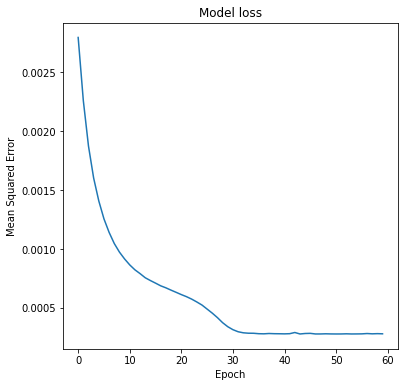

In [ ]:
#plot the mean square errors per the epochs
plt.figure(figsize=(6,6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.savefig('loss1')
plt.show()

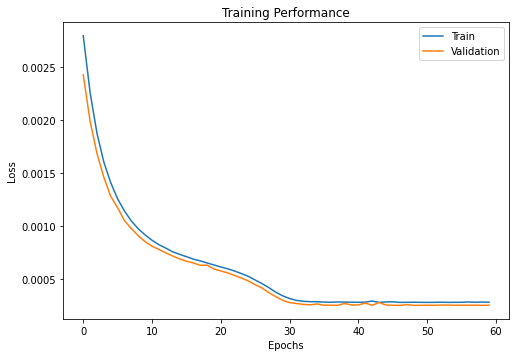

In [ ]:
##plot of the validation adn training loss per epoch
plot_hist(history.history, xsize=8, ysize=12)
plt.show()

In [ ]:
def baseline():
    # create model
    model = Sequential()
    
    model.add(Dense(units = 1, input_dim=1, activation='linear'))
    model.add(Dense(units = 1, input_dim=1, activation='tanh'))
  
    #a fully connected layer for the output
    model.add(Dense(1, activation='linear'))
    

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

In [ ]:
model = baseline()

In [ ]:
model.summary() #View model parameters

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model and calculate loss at each epoch
history = model.fit(X_train, J_train,validation_data=(X_val,J_val),batch_size=20,epochs=100)  

Epoch 1/100
124/124 [==============================] - 1s 4ms/step - loss: 9.3222e-04 - mean_squared_error: 9.3222e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2/100
124/124 [==============================] - 0s 4ms/step - loss: 8.2464e-04 - mean_squared_error: 8.2464e-04 - val_loss: 9.4846e-04 - val_mean_squared_error: 9.4846e-04
Epoch 3/100
124/124 [==============================] - 0s 4ms/step - loss: 7.5858e-04 - mean_squared_error: 7.5858e-04 - val_loss: 9.0083e-04 - val_mean_squared_error: 9.0083e-04
Epoch 4/100
124/124 [==============================] - 0s 4ms/step - loss: 7.1804e-04 - mean_squared_error: 7.1804e-04 - val_loss: 8.3419e-04 - val_mean_squared_error: 8.3419e-04
Epoch 5/100
124/124 [==============================] - 0s 4ms/step - loss: 6.8239e-04 - mean_squared_error: 6.8239e-04 - val_loss: 8.0391e-04 - val_mean_squared_error: 8.0391e-04
Epoch 6/100
124/124 [==============================] - 0s 4ms/step - loss: 6.6034e-04 - mean_squared_error: 6.603

In [ ]:
#predict on validation data
val_prediction = model.predict(X_val)


In [ ]:
print('The validation mean squared error is ', mean_squared_error(J_val, val_prediction))

The validation mean squared error is  0.0003038018885303403


In [ ]:
#evaluate on test data
test_prediction = model.predict(X_test)

In [ ]:
print('The testing mean squared error is ', mean_squared_error(J_test, test_prediction))

The testing mean squared error is  0.000231850145642436


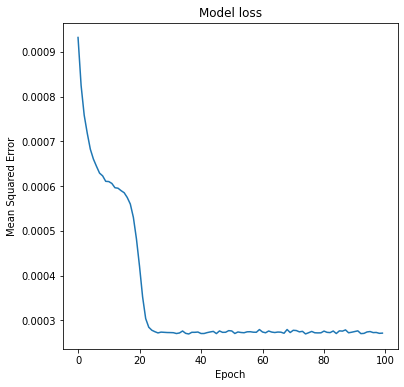

In [ ]:
#plot the mean square errors per the epochs
plt.figure(figsize=(6,6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.savefig('loss1')
plt.show()

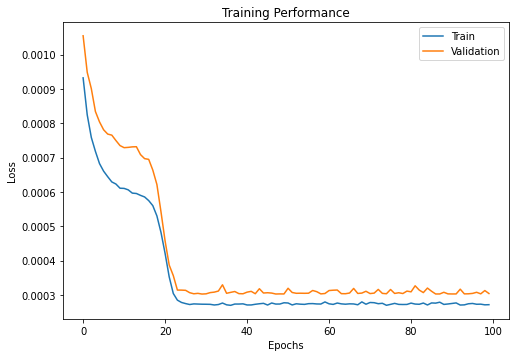

In [ ]:
##plot of the validation adn training loss per epoch
plot_hist(history.history, xsize=8, ysize=12)
plt.show()

#**BEST MODEL FOR MICROSOFT**

Creating the neural network

In [ ]:
def baseline():
    # create model
    model = Sequential()
    
    model.add(Dense(units = 1, input_dim=1, activation='linear'))
    model.add(Dense(units = 4, input_dim=1, activation='tanh'))
    
    #a fully connected layer for the output
    model.add(Dense(1, activation='linear'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

In [ ]:
model = baseline()

In [ ]:
model.summary() #View model parameters

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_90 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 5         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model and calculate loss at each epoch
history = model.fit(X_train, M_train,validation_data=(X_val,M_val),batch_size=20,epochs=80) 

Epoch 1/80
124/124 [==============================] - 0s 2ms/step - loss: 5.7425e-04 - mean_squared_error: 5.7425e-04 - val_loss: 3.9985e-04 - val_mean_squared_error: 3.9985e-04
Epoch 2/80
124/124 [==============================] - 0s 2ms/step - loss: 3.7297e-04 - mean_squared_error: 3.7297e-04 - val_loss: 2.8928e-04 - val_mean_squared_error: 2.8928e-04
Epoch 3/80
124/124 [==============================] - 0s 2ms/step - loss: 2.7243e-04 - mean_squared_error: 2.7243e-04 - val_loss: 2.2296e-04 - val_mean_squared_error: 2.2296e-04
Epoch 4/80
124/124 [==============================] - 0s 2ms/step - loss: 2.2367e-04 - mean_squared_error: 2.2367e-04 - val_loss: 2.0097e-04 - val_mean_squared_error: 2.0097e-04
Epoch 5/80
124/124 [==============================] - 0s 2ms/step - loss: 2.1189e-04 - mean_squared_error: 2.1189e-04 - val_loss: 2.0862e-04 - val_mean_squared_error: 2.0862e-04
Epoch 6/80
124/124 [==============================] - 0s 2ms/step - loss: 2.0875e-04 - mean_squared_error: 2.0

In [ ]:
#predict on validation data
val_prediction = model.predict(X_val)

In [ ]:
print('The validation mean squared error is ', mean_squared_error(M_val, val_prediction))

The validation mean squared error is  0.0001998626352758347


In [ ]:
#evaluate on test data
test_prediction = model.predict(X_test)

In [ ]:
print('The testing mean squared error is ', mean_squared_error(M_test, test_prediction))

The testing mean squared error is  0.00018005939712854564


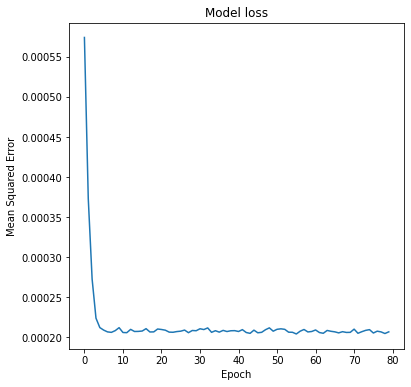

In [ ]:
#plot the mean square errors per the epochs
plt.figure(figsize=(6,6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.savefig('loss1')
plt.show()

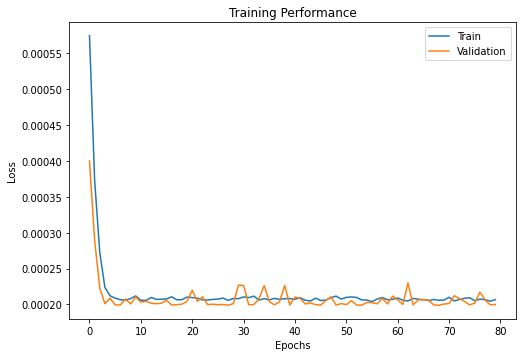

In [ ]:
##plot of the training and validation loss per epoch
plot_hist(history.history, xsize=8, ysize=12)
plt.show()